In [2]:
import os

base_path = r"C:\Users\debas\Desktop\Image Segmentation"


for root, dirs, files in os.walk(base_path):
    print(root)
    break


C:\Users\debas\Desktop\Image Segmentation


In [3]:
print(os.listdir(base_path))


['Brain_MRI', 'imageseg.ipynb']


In [4]:
import os

data_path = r"C:\Users\debas\Desktop\Image Segmentation\Brain_MRI"
print(os.listdir(data_path))


['data.csv', 'data_mask.csv', 'TCGA_CS_4941_19960909', 'TCGA_CS_4942_19970222', 'TCGA_CS_4943_20000902', 'TCGA_CS_4944_20010208', 'TCGA_CS_5393_19990606', 'TCGA_CS_5395_19981004', 'TCGA_CS_5396_20010302', 'TCGA_CS_5397_20010315', 'TCGA_CS_6186_20000601', 'TCGA_CS_6188_20010812', 'TCGA_CS_6290_20000917', 'TCGA_CS_6665_20010817', 'TCGA_CS_6666_20011109', 'TCGA_CS_6667_20011105', 'TCGA_CS_6668_20011025', 'TCGA_CS_6669_20020102', 'TCGA_DU_5849_19950405', 'TCGA_DU_5851_19950428', 'TCGA_DU_5852_19950709', 'TCGA_DU_5853_19950823', 'TCGA_DU_5854_19951104', 'TCGA_DU_5855_19951217', 'TCGA_DU_5871_19941206', 'TCGA_DU_5872_19950223', 'TCGA_DU_5874_19950510', 'TCGA_DU_6399_19830416', 'TCGA_DU_6400_19830518', 'TCGA_DU_6401_19831001', 'TCGA_DU_6404_19850629', 'TCGA_DU_6405_19851005', 'TCGA_DU_6407_19860514', 'TCGA_DU_6408_19860521', 'TCGA_DU_7008_19830723', 'TCGA_DU_7010_19860307', 'TCGA_DU_7013_19860523', 'TCGA_DU_7014_19860618', 'TCGA_DU_7018_19911220', 'TCGA_DU_7019_19940908', 'TCGA_DU_7294_198901

In [5]:
import os

patient_path = r"C:\Users\debas\Desktop\Image Segmentation\Brain_MRI\TCGA_CS_4941_19960909"
print(os.listdir(patient_path)[:10])  # show first 10 files


['TCGA_CS_4941_19960909_1.tif', 'TCGA_CS_4941_19960909_10.tif', 'TCGA_CS_4941_19960909_10_mask.tif', 'TCGA_CS_4941_19960909_11.tif', 'TCGA_CS_4941_19960909_11_mask.tif', 'TCGA_CS_4941_19960909_12.tif', 'TCGA_CS_4941_19960909_12_mask.tif', 'TCGA_CS_4941_19960909_13.tif', 'TCGA_CS_4941_19960909_13_mask.tif', 'TCGA_CS_4941_19960909_14.tif']


In [7]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
    --------------------------------------- 0.8/40.2 MB 2.2 MB/s eta 0:00:18
   - -------------------------------------- 1.0/40.2 MB 2.1 MB/s eta 0:00:19
   - -------------------------------------- 1.6/40.2 MB 2.3 MB/s eta 0:00:18
   -- ------------------------------------- 2.1/40.2 MB 2.2 MB/s eta 0:00:18
   -- ------------------------------------- 2.4/40.2 MB 2.1 MB/s eta 0:00:18
   -- ------------------------------------- 2.6/40.2 MB 2.0 MB/s eta 0:00:19
   -- ------------------------------------- 2.9/40.2 MB 1.8 MB/s eta 0:00:21
   --- ------------------------------------ 3.1/40.2 MB 1.8 MB/s eta 0:00:22
   --- ------------------------------------ 3.4/40.2 MB 1.8 MB/s eta 0:00:22
   --- ------------------------------------ 3.9/40.2 MB 1.7 MB/s eta 0:00:22
   ---- ----

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.4.2 which is incompatible.


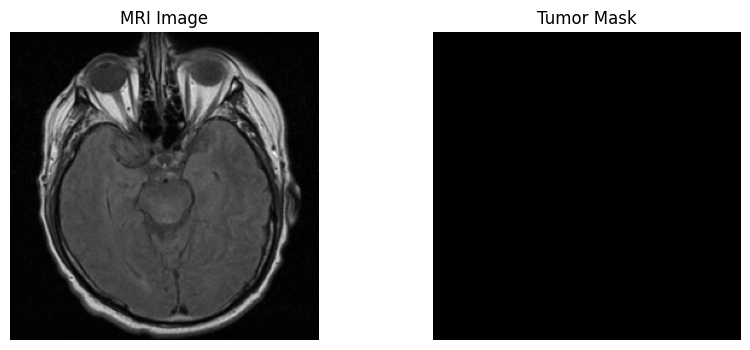

In [8]:
import cv2
import matplotlib.pyplot as plt

# Example file names
img_path = r"C:\Users\debas\Desktop\Image Segmentation\Brain_MRI\TCGA_CS_4941_19960909\TCGA_CS_4941_19960909_10.tif"
mask_path = r"C:\Users\debas\Desktop\Image Segmentation\Brain_MRI\TCGA_CS_4941_19960909\TCGA_CS_4941_19960909_10_mask.tif"

# Read images
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Show side by side
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("MRI Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Tumor Mask")
plt.imshow(mask, cmap="gray")
plt.axis("off")

plt.show()


In [9]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

IMG_SIZE = 128
base_path = r"C:\Users\debas\Desktop\Image Segmentation\Brain_MRI"

images = []
masks = []

for patient in tqdm(os.listdir(base_path)):
    patient_path = os.path.join(base_path, patient)
    
    if not os.path.isdir(patient_path):
        continue

    files = os.listdir(patient_path)
    
    for file in files:
        if file.endswith(".tif") and not file.endswith("_mask.tif"):
            img_path = os.path.join(patient_path, file)
            mask_path = os.path.join(patient_path, file.replace(".tif", "_mask.tif"))

            if os.path.exists(mask_path):
                img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
                mask = Image.open(mask_path).resize((IMG_SIZE, IMG_SIZE))

                img = np.array(img) / 255.0
                mask = np.array(mask) / 255.0
                mask = np.expand_dims(mask, axis=-1)

                images.append(img)
                masks.append(mask)

images = np.array(images, dtype=np.float32)
masks = np.array(masks, dtype=np.float32)

print("Images shape:", images.shape)
print("Masks shape:", masks.shape)


100%|██████████| 112/112 [00:18<00:00,  6.12it/s]


Images shape: (3929, 128, 128, 3)
Masks shape: (3929, 128, 128, 1)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    images, masks, test_size=0.2, random_state=42
)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)


Train: (3143, 128, 128, 3)
Validation: (786, 128, 128, 3)


In [12]:
!pip uninstall -y numpy
!pip install numpy==1.26.4


Found existing installation: numpy 2.4.2
Uninstalling numpy-2.4.2:
  Successfully uninstalled numpy-2.4.2


You can safely remove it manually.
You can safely remove it manually.


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [13]:
!pip uninstall -y opencv-python
!pip install opencv-python==4.8.0.76


Found existing installation: opencv-python 4.13.0.92
Uninstalling opencv-python-4.13.0.92:
  Successfully uninstalled opencv-python-4.13.0.92


You can safely remove it manually.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.1 MB 6.3 MB/s eta 0:00:06
   -- ------------------------------------- 2.1/38.1 MB 6.5 MB/s eta 0:00:06
   --- ------------------------------------ 3.7/38.1 MB 6.2 MB/s eta 0:00:06
   ----- ---------------------------------- 5.2/38.1 MB 6.6 MB/s eta 0:00:05
   ------ --------------------------------- 6.0/38.1 MB 6.4 MB/s eta 0:00:06
   ------- -------------------------------- 6.8/38.1 MB 6.0 MB/s eta 0:00:06
   -------- ------------------------------- 7.9/38.1 MB 5.7 MB/s eta 0:00:06
   --------- ------------------------------ 9.4/38.1 MB 5.8 MB/s eta 0:00:05
   ---------- ----------------------------- 10.2/38.1 MB 5.7 MB/s eta 0:00:05
   ------------ --------------------------- 11.5/38.1 MB 5.7 MB/s eta 0:00:05
   ------------ --------------------------- 12.3/38.1 MB 5.5 MB/s eta 0:00:05
  

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding="same", activation="relu")(x)
    x = layers.Conv2D(filters, 3, padding="same", activation="relu")(x)
    return x

def encoder_block(x, filters):
    f = conv_block(x, filters)
    p = layers.MaxPooling2D((2, 2))(f)
    return f, p

def decoder_block(x, skip, filters):
    x = layers.Conv2DTranspose(filters, 2, strides=2, padding="same")(x)
    x = layers.Concatenate()([x, skip])
    x = conv_block(x, filters)
    return x

inputs = layers.Input(shape=(128, 128, 3))

f1, p1 = encoder_block(inputs, 16)
f2, p2 = encoder_block(p1, 32)
f3, p3 = encoder_block(p2, 64)

bottleneck = conv_block(p3, 128)

d1 = decoder_block(bottleneck, f3, 64)
d2 = decoder_block(d1, f2, 32)
d3 = decoder_block(d2, f1, 16)

outputs = layers.Conv2D(1, 1, padding="same", activation="sigmoid")(d3)

model = Model(inputs, outputs)
model.summary()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.4.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\debas\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\debas\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\debas\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.4.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.4.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\debas\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\debas\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\debas\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.4.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.4.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\debas\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\debas\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\debas\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.4.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



SystemError: initialization of _pywrap_checkpoint_reader raised unreported exception